In [1]:
import os
import pandas as pd

In [2]:
data_dir="E:\ML Course\Tree Based Models\Data"

In [3]:
os.chdir(data_dir)

In [4]:
dat=pd.read_csv("credit_history.csv")
dat.head()

default  amount grade  years ownership   income  age
0        0    1000     B    2.0      RENT  19200.0   24
1        1    6500     A    2.0  MORTGAGE  66000.0   28
2        0    2400     A    2.0      RENT  60000.0   36
3        0   10000     C    3.0      RENT  62000.0   24
4        1    4000     C    2.0      RENT  20000.0   28

In [5]:
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [6]:
dat['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [7]:
dat['years'].fillna(4,inplace=True)

In [8]:
X=dat.drop("default",axis=1)

In [9]:
X.head()

amount grade  years ownership   income  age
0    1000     B    2.0      RENT  19200.0   24
1    6500     A    2.0  MORTGAGE  66000.0   28
2    2400     A    2.0      RENT  60000.0   36
3   10000     C    3.0      RENT  62000.0   24
4    4000     C    2.0      RENT  20000.0   28

In [10]:
X=pd.get_dummies(X)

In [11]:
X.head()

amount  years   income  age  grade_A  grade_B  grade_C  grade_D  grade_E  \
0    1000    2.0  19200.0   24        0        1        0        0        0   
1    6500    2.0  66000.0   28        1        0        0        0        0   
2    2400    2.0  60000.0   36        1        0        0        0        0   
3   10000    3.0  62000.0   24        0        0        1        0        0   
4    4000    2.0  20000.0   28        0        0        1        0        0   

   grade_F  grade_G  ownership_MORTGAGE  ownership_OTHER  ownership_OWN  \
0        0        0                   0                0              0   
1        0        0                   1                0              0   
2        0        0                   0                0              0   
3        0        0                   0                0              0   
4        0        0                   0                0              0   

   ownership_RENT  
0               1  
1               0  
2               1  
3               1  
4               1

In [12]:
y=dat['default']

In [13]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [14]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.62742561448900391

In [15]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.67212508203527865

In [16]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir)

In [17]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                         special_characters=True,proportion=True)

In [18]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [19]:
from IPython.display import Image

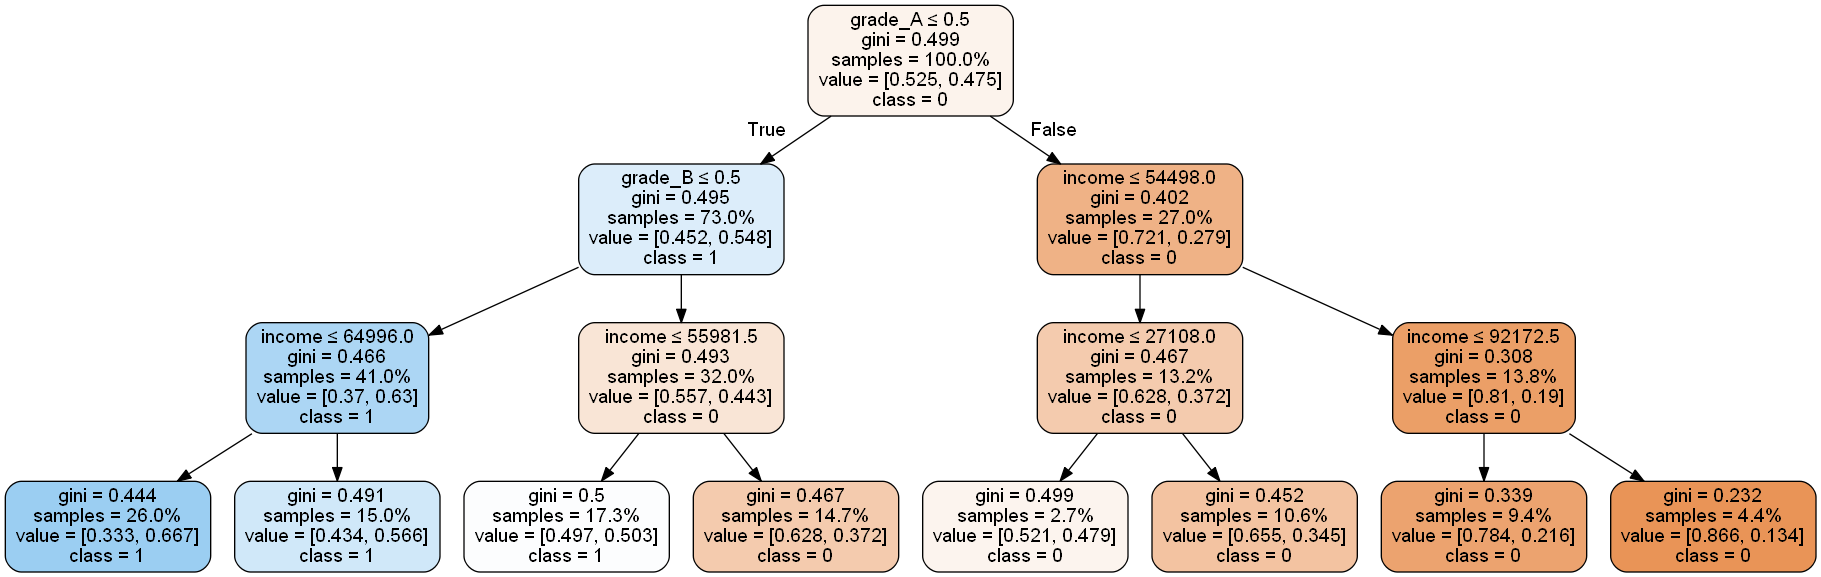

In [20]:
Image(graph.create_png())

### Grid Search-Cross Validation

In [21]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [22]:
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [23]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')

In [24]:
mod.best_score_

0.63145122148519661